# Testing validity with IL Synthesis Dataset

## Import Synthesis Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def loadDataset(path):
    a = pd.read_csv(path)
    return a.drop(a.columns[0], axis=1)
def groupByRace(dataset):
    return dataset.groupby(by = ["race"])
def groupByFIPS(dataset):
    return dataset.groupby(by = ["FIPS"])
def groupByFIPSAndRace(dataset):
    return dataset.groupby(by = ["FIPS", "race"])

In [3]:
ILdataset = loadDataset('./data/generatedDatasets/IL_dataset_5mil.csv')

In [4]:
ILdataset.groupby(by = ["FIPS"]).FIPS.count()

FIPS
170010001001000     5
170010001001001     1
170010001001007    21
170010001001008    79
170010001001009     6
                   ..
172030307003217     1
172030307003223     2
172030307003226     3
172030307003228     5
172030307003231     1
Name: FIPS, Length: 264121, dtype: int64

In [5]:
ILdataset.groupby(by = ["race"]).FIPS.count()

race
P1_003N    3070882
P1_004N     705193
P1_005N      38080
P1_006N     294728
P1_007N       1725
            ...   
P1_066N         15
P1_067N          7
P1_068N          3
P1_069N          3
P1_071N         37
Name: FIPS, Length: 64, dtype: int64

In [6]:
ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])

count
FIPS            race          
170010001001000 P1_003N      5
170010001001001 P1_003N      1
170010001001007 P1_003N     18
                P1_004N      1
                P1_015N      2
...                        ...
172030307003217 P1_003N      1
172030307003223 P1_003N      2
172030307003226 P1_003N      3
172030307003228 P1_003N      5
172030307003231 P1_003N      1

[652597 rows x 1 columns]

In [7]:
ILDatasetProcessed = pd.DataFrame(ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])).reset_index()
ILDatasetProcessed

,FIPS,race,count
0,170010001001000,P1_003N,5
1,170010001001001,P1_003N,1
2,170010001001007,P1_003N,18
3,170010001001007,P1_004N,1
4,170010001001007,P1_015N,2
...,...,...,...
652592,172030307003217,P1_003N,1
652593,172030307003223,P1_003N,2
652594,172030307003226,P1_003N,3
652595,172030307003228,P1_003N,5


## Import Real FIPS Data

In [8]:
from state import StateByBlockGroup
StateIL = StateByBlockGroup("17")
StateIL.decennialData

,GEO_ID,NAME,P1_001N,P1_001NA,P1_002N,P1_002NA,P1_003N,P1_003NA,P1_004N,P1_004NA,...,P1_069N,P1_069NA,P1_070N,P1_070NA,P1_071N,P1_071NA,state,county,tract,block
0,1000000US170010001001000,"Block 1000, Block Group 1, Census Tract 1, Ada...",17,NaN,17,NaN,16,NaN,1,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1000
1,1000000US170010001001001,"Block 1001, Block Group 1, Census Tract 1, Ada...",2,NaN,2,NaN,1,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1001
2,1000000US170010001001002,"Block 1002, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1002
3,1000000US170010001001003,"Block 1003, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1003
4,1000000US170010001001004,"Block 1004, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,1000000US172030307003228,"Block 3228, Block Group 3, Census Tract 307, W...",11,NaN,11,NaN,11,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3228
369974,1000000US172030307003229,"Block 3229, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3229
369975,1000000US172030307003230,"Block 3230, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3230
369976,1000000US172030307003231,"Block 3231, Block Group 3, Census Tract 307, W...",7,NaN,6,NaN,6,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3231


In [9]:
def processRealDataset(datasetdf):
    datasetdf["FIPS"] = datasetdf["GEO_ID"].map(lambda x: x[-15:])
    return datasetdf[["FIPS",
                'P1_003N', 'P1_004N', 'P1_005N', 'P1_006N', 'P1_007N',
                'P1_008N', 'P1_011N', 'P1_012N', 'P1_013N', 'P1_014N',
                'P1_015N', 'P1_016N', 'P1_017N', 'P1_018N', 'P1_019N',
                'P1_020N', 'P1_021N', 'P1_022N', 'P1_023N', 'P1_024N',
                'P1_025N', 'P1_027N', 'P1_028N', 'P1_029N', 'P1_030N',
                'P1_031N', 'P1_032N', 'P1_033N', 'P1_034N', 'P1_035N',
                'P1_036N', 'P1_037N', 'P1_038N', 'P1_039N', 'P1_040N',
                'P1_041N', 'P1_042N', 'P1_043N', 'P1_044N', 'P1_045N',
                'P1_046N', 'P1_048N', 'P1_049N', 'P1_050N', 'P1_051N',
                'P1_052N', 'P1_053N', 'P1_054N', 'P1_055N', 'P1_056N',
                'P1_057N', 'P1_058N', 'P1_059N', 'P1_060N', 'P1_061N',
                'P1_062N', 'P1_063N', 'P1_064N', 'P1_065N', 'P1_066N',
                'P1_067N', 'P1_068N', 'P1_069N', 'P1_071N'
            ]]

In [10]:
processedRealILDataset = processRealDataset(StateIL.decennialData)
processedRealILDataset

,FIPS,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_011N,P1_012N,P1_013N,...,P1_061N,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_071N
0,170010001001000,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,170010001001001,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,170010001001002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,170010001001003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,170010001001004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,172030307003228,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369974,172030307003229,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369975,172030307003230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369976,172030307003231,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Comparing the two datasets distributions

## By Races

In [11]:
popByRaceSynthesis = ILdataset.groupby(by = ["race"]).FIPS.count()
popByRaceSynthesis

race
P1_003N    3070882
P1_004N     705193
P1_005N      38080
P1_006N     294728
P1_007N       1725
            ...   
P1_066N         15
P1_067N          7
P1_068N          3
P1_069N          3
P1_071N         37
Name: FIPS, Length: 64, dtype: int64

In [12]:
popByRaceReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 0)
popByRaceReal

P1_003N    7868227
P1_004N    1808271
P1_005N      96498
P1_006N     754878
P1_007N       4501
            ...   
P1_066N         35
P1_067N         14
P1_068N          4
P1_069N         15
P1_071N         84
Length: 64, dtype: int64

### Plot samples

In [13]:
popByRaceSynthesis /= popByRaceSynthesis.sum()
popByRaceReal /= popByRaceReal.sum()

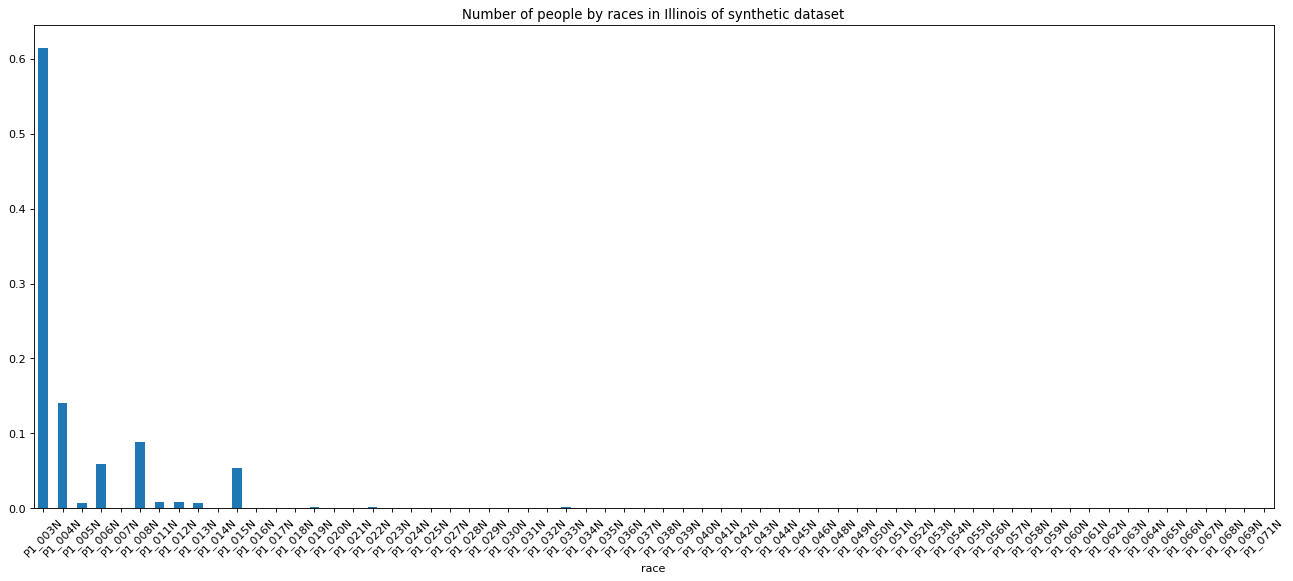

In [14]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceSynthesis.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

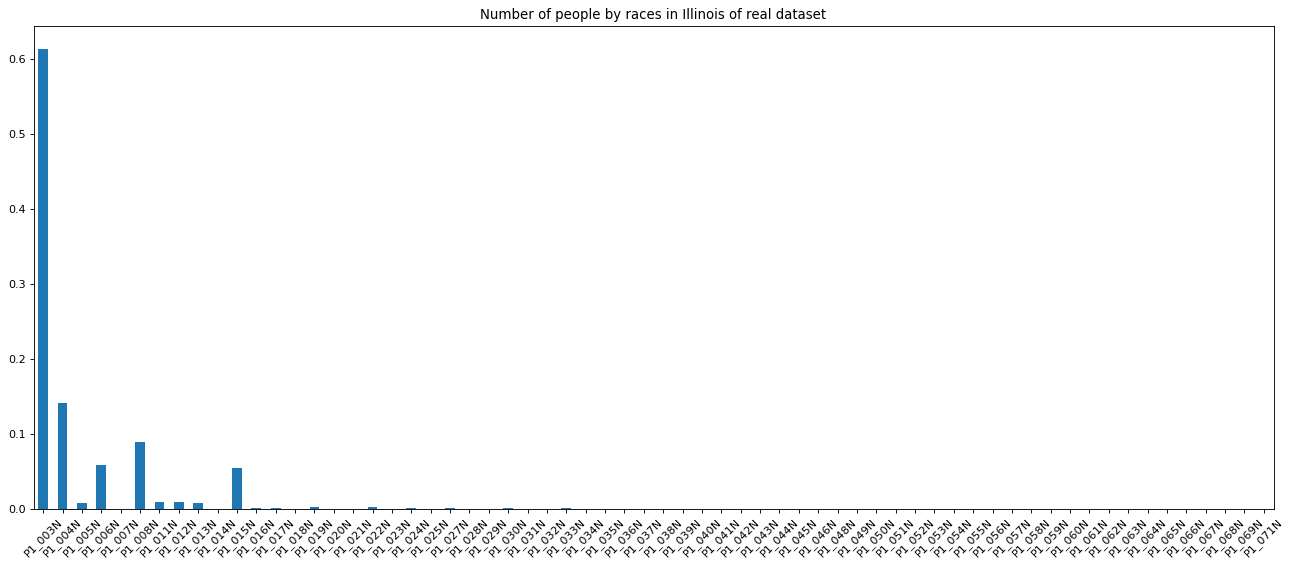

In [15]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceReal.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Compare sample mean and standard deviation

In [16]:
print("Mean of synthetic dataset", popByRaceSynthesis.mean())
print("Standard deviation of synthetic dataset", popByRaceSynthesis.std())

Mean of synthetic dataset 0.015624999999999998
Standard deviation of synthetic dataset 0.07928431146206648


In [17]:
print("Mean of real dataset", popByRaceReal.mean())
print("Standard deviation of real dataset", popByRaceReal.std())

Mean of real dataset 0.015625
Standard deviation of real dataset 0.07927505077520923


### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [18]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=popByRaceSynthesis, b=popByRaceReal, equal_var=True)

Ttest_indResult(statistic=0.0, pvalue=1.0)

Due to p value = 0.9999535792552408 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [19]:
popByRaceReal.name = "Real"
popByRaceSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByRaceSynthesis, popByRaceReal, right_index = True,
               left_index = True)

mergeddf

,Synthesis,Real
race,,
P1_003N,6.141764e-01,6.140730e-01
P1_004N,1.410386e-01,1.411259e-01
P1_005N,7.616000e-03,7.531153e-03
P1_006N,5.894560e-02,5.891419e-02
P1_007N,3.450000e-04,3.512790e-04
...,...,...
P1_066N,3.000000e-06,2.731563e-06
P1_067N,1.400000e-06,1.092625e-06
P1_068N,6.000000e-07,3.121786e-07


In [20]:
stat, p, dof, expected = stats.chi2_contingency(mergeddf)
p

1.0

In [21]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


Due to p value = 0.9908510047877276 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_1: $ The two datasets NOT come from the same ditribution 


In [22]:
stats.ks_2samp(popByRaceSynthesis, popByRaceReal)

KstestResult(statistic=0.0625, pvalue=0.9997180010908584)

Due to p value = 0.9999999044253438 >> 0.05. Therefore, there is no evidence to support the distributions of the two populations are not the same.

## By FIPS

In [23]:
popByFIPSSynthesis = ILdataset.groupby(by = ["FIPS"]).FIPS.count()
popByFIPSSynthesis = popByFIPSSynthesis.rename(lambda x: str(x))
popByFIPSSynthesis

FIPS
170010001001000     5
170010001001001     1
170010001001007    21
170010001001008    79
170010001001009     6
                   ..
172030307003217     1
172030307003223     2
172030307003226     3
172030307003228     5
172030307003231     1
Name: FIPS, Length: 264121, dtype: int64

In [24]:
popByFIPSReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 1)
popByFIPSReal = popByFIPSReal.rename(processedRealILDataset['FIPS'])
popByFIPSReal

170010001001000    17
170010001001001     2
170010001001002     0
170010001001003     0
170010001001004     0
                   ..
172030307003228    11
172030307003229     0
172030307003230     0
172030307003231     7
172030307003232     0
Length: 369978, dtype: int64

In [25]:
popByFIPSSynthesis /= popByFIPSSynthesis.sum()
popByFIPSReal /= popByFIPSReal.sum()

### Plot samples

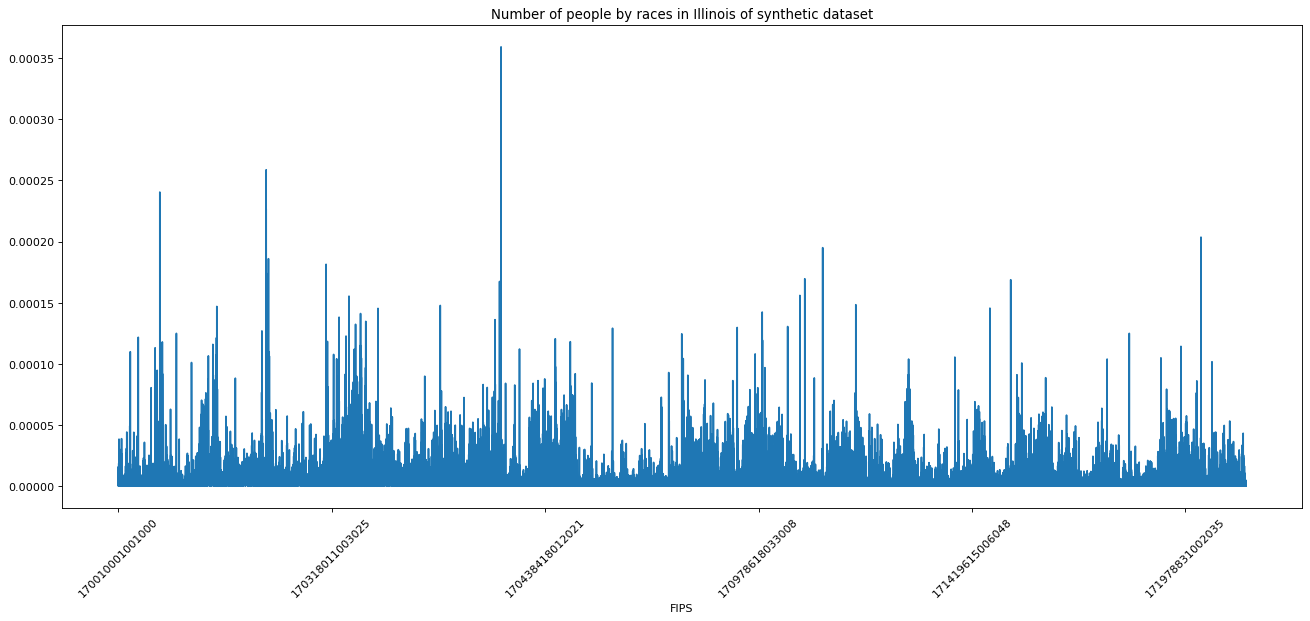

In [26]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSSynthesis.plot(x='FIPS', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

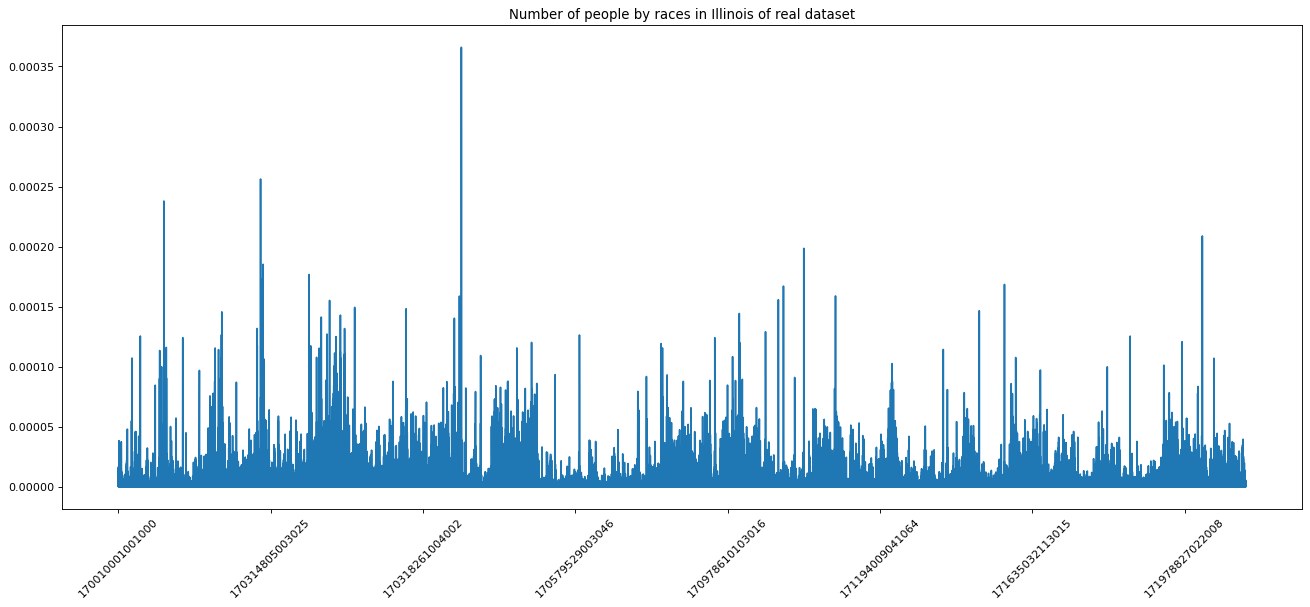

In [27]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSReal.plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [28]:
popByFIPSReal.name = "Real"
popByFIPSSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByFIPSSynthesis, popByFIPSReal, how= 'outer', right_index = True,
               left_index = True).fillna(0)
mergeddf = mergeddf.astype({'Synthesis': 'float32'})
mergeddf

,Synthesis,Real
170010001001000,1.000000e-06,1.326759e-06
170010001001001,2.000000e-07,1.560893e-07
170010001001002,0.000000e+00,0.000000e+00
170010001001003,0.000000e+00,0.000000e+00
170010001001004,0.000000e+00,0.000000e+00
...,...,...
172030307003228,1.000000e-06,8.584912e-07
172030307003229,0.000000e+00,0.000000e+00
172030307003230,0.000000e+00,0.000000e+00
172030307003231,2.000000e-07,5.463126e-07


### Compare sample mean and standard deviation

In [29]:
print("Mean of synthetic dataset", mergeddf["Synthesis"].mean())
print("Standard deviation of synthetic dataset", mergeddf["Synthesis"].std())

Mean of synthetic dataset 2.7017952106689336e-06
Standard deviation of synthetic dataset 5.332134605851024e-06


In [30]:
print("Mean of real dataset", mergeddf["Real"].mean())
print("Standard deviation of real dataset", mergeddf["Real"].std())

Mean of real dataset 2.7028634135016203e-06
Standard deviation of real dataset 5.291909099026957e-06


### Binning FIPS

In [40]:
N = 20
mergeddf.index = mergeddf.index.map(lambda x : int(x))
binningdf = mergeddf.groupby(mergeddf.index // N).sum()
binningdf

,Synthesis,Real
8500500050050,0.000033,0.000032
8500500050051,0.000034,0.000030
8500500050052,0.000029,0.000027
8500500050100,0.000057,0.000058
8500500050150,0.000049,0.000048
...,...,...
8601515350157,0.000023,0.000022
8601515350158,0.000016,0.000014
8601515350159,0.000020,0.000018
8601515350160,0.000024,0.000023


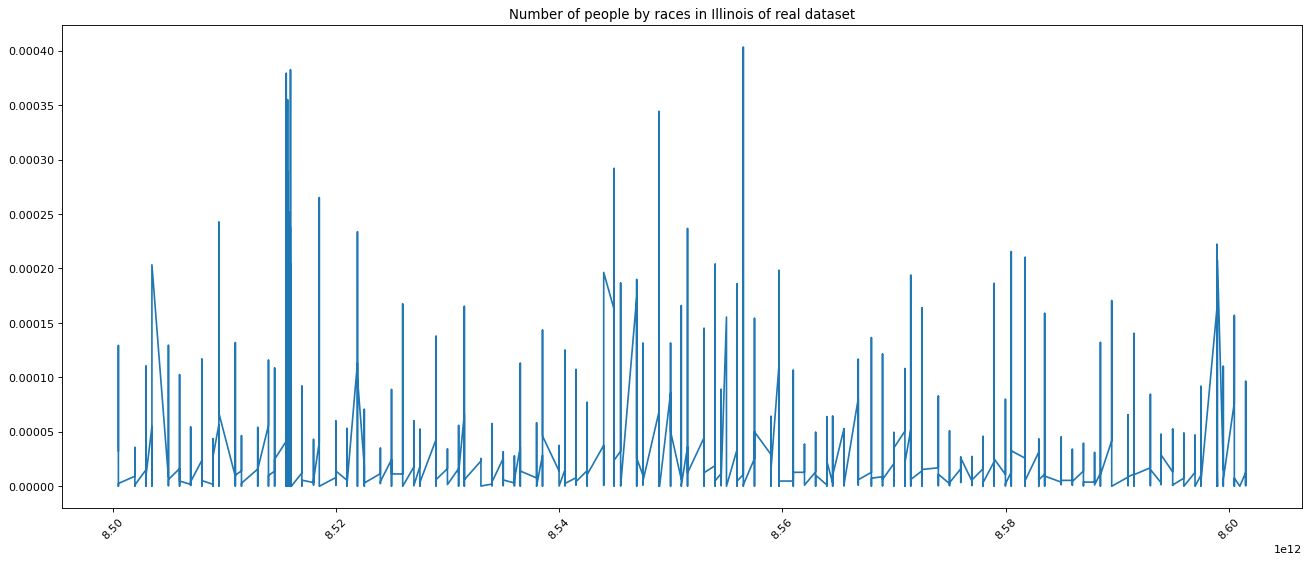

In [41]:
plt.figure(figsize=(20, 8), dpi=80)
binningdf["Synthesis"].plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

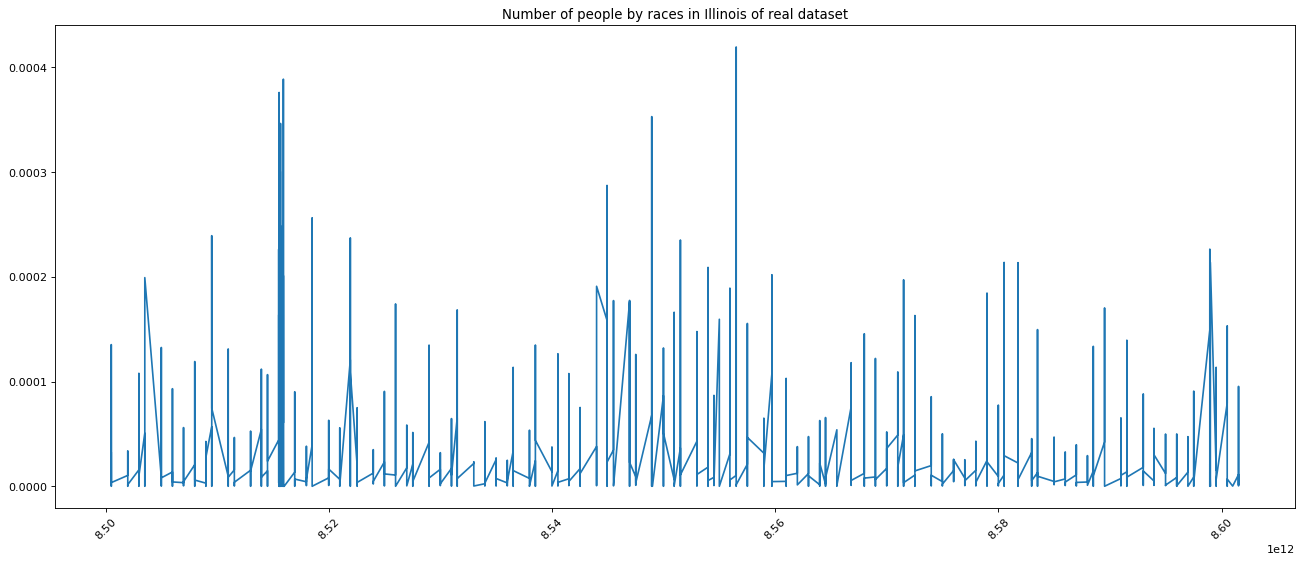

In [42]:
plt.figure(figsize=(20, 8), dpi=80)
binningdf["Real"].plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [43]:
ct = pd.crosstab(binningdf["Real"], binningdf["Synthesis"], margins=True)
ct

Synthesis,0.0,2.0000000233721948e-07,4.0000000467443897e-07,6.000000212225132e-07,8.000000093488779e-07,9.999999974752427e-07,1.2000000424450263e-06,1.3999999737279722e-06,1.40000008741481e-06,1.6000000186977559e-06,...,0.0002891999902203679,0.00029200001154094934,0.00029799999902024865,0.0003176000027451664,0.00034440000308677554,0.0003549999964889139,0.0003794000076595694,0.0003826000029221177,0.00040339998668059707,All
Real,,,,,,,,,,,,,,,,,,,,,
0.0,275,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,275
7.804465059331885e-08,15,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1.560893011866377e-07,11,7,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2.3413395177995655e-07,6,9,8,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
3.121786023732754e-07,7,3,8,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0003529959546335811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
0.0003760191265586102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
0.0003887404046053212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [44]:
g, p, dof, expctd = stats.chi2_contingency(ct, lambda_="log-likelihood")

In [45]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(g) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [46]:
p

1.0

Due to p value = 1.0 >> 0.05.Therefore, there is no evidence to support the distributions of the two populations are not the same.

### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [47]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=binningdf["Synthesis"], b=binningdf["Real"], equal_var=True)

Ttest_indResult(statistic=-3.1607380112429583e-06, pvalue=0.9999974781096252)

Due to p value = 0.9934190781015679 >> 0.05.Therefore, there is no evidence to support the population mean of the two populations are not the same.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_q: $ The two datasets NOT come from the same ditribution 


In [48]:
stats.ks_2samp(binningdf["Real"], binningdf["Synthesis"])

KstestResult(statistic=0.006815419343636053, pvalue=0.6558429678331106)

Due to p value = 0.4781688122978446 >> 0.05. Therefore, there is no evidence to support the two datasets NOT come from the same ditribution

## Benchmarking dataset

We will test the dataset by the 